<a href="https://colab.research.google.com/github/elavens/PyMe/blob/main/efficentNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Data (2)/Data/Train')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/drive/MyDrive/Data (2)/Data/Train' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])


# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

['Neem', 'Ashoka', 'Aloe_Vera']
Types of classes labels found:  3
  Labels                              image
0   Neem   dataset_path/Neem/images (6).jpg
1   Neem   dataset_path/Neem/images (8).jpg
2   Neem  dataset_path/Neem/images (28).jpg
3   Neem  dataset_path/Neem/images (29).jpg
4   Neem  dataset_path/Neem/images (11).jpg
       Labels                                   image
85  Aloe_Vera   dataset_path/Aloe_Vera/images (8).jpg
86  Aloe_Vera   dataset_path/Aloe_Vera/images (1).jpg
87  Aloe_Vera  dataset_path/Aloe_Vera/images (11).jpg
88  Aloe_Vera  dataset_path/Aloe_Vera/images (21).jpg
89  Aloe_Vera  dataset_path/Aloe_Vera/images (17).jpg


In [5]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  90
Neem         30
Ashoka       30
Aloe_Vera    30
Name: Labels, dtype: int64


In [7]:
import cv2
path = '/content/drive/MyDrive/Data (2)/Data/Train/'
dataset_path = os.listdir('/content/drive/MyDrive/Data (2)/Data/Train')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [8]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(90, 224, 224, 3)

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem'
 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem'
 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem' 'Neem'
 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka'
 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka'
 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka'
 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Ashoka' 'Aloe_Vera'
 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera'
 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera'
 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera'
 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera'
 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera' 'Aloe_Vera']
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0

In [10]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(85, 224, 224, 3)
(85, 3)
(5, 224, 224, 3)
(5, 3)


In [12]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


NUM_CLASSES = 3
IMG_SIZE = 224

In [13]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = img_augmentation(inputs)
    x = inputs
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [14]:
model = build_model(num_classes=NUM_CLASSES)

16705208/16705208 [==============================] - 1s 0us/step


In [15]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


#plot_hist(hist)

Epoch 1/30
3/3 - 9s - loss: 1.3029 - accuracy: 0.5294 - 9s/epoch - 3s/step
Epoch 2/30
3/3 - 8s - loss: 1.9074 - accuracy: 0.4471 - 8s/epoch - 3s/step
Epoch 3/30
3/3 - 6s - loss: 1.7667 - accuracy: 0.3765 - 6s/epoch - 2s/step
Epoch 4/30
3/3 - 8s - loss: 1.8345 - accuracy: 0.3412 - 8s/epoch - 3s/step
Epoch 5/30
3/3 - 6s - loss: 1.4577 - accuracy: 0.4471 - 6s/epoch - 2s/step
Epoch 6/30
3/3 - 8s - loss: 1.3965 - accuracy: 0.4000 - 8s/epoch - 3s/step
Epoch 7/30
3/3 - 6s - loss: 1.6246 - accuracy: 0.3647 - 6s/epoch - 2s/step
Epoch 8/30
3/3 - 10s - loss: 1.4271 - accuracy: 0.3647 - 10s/epoch - 3s/step
Epoch 9/30
3/3 - 6s - loss: 1.4546 - accuracy: 0.3765 - 6s/epoch - 2s/step
Epoch 10/30
3/3 - 8s - loss: 1.3263 - accuracy: 0.3882 - 8s/epoch - 3s/step
Epoch 11/30
3/3 - 6s - loss: 1.4346 - accuracy: 0.4000 - 6s/epoch - 2s/step
Epoch 12/30
3/3 - 8s - loss: 1.5702 - accuracy: 0.3765 - 8s/epoch - 3s/step
Epoch 13/30
3/3 - 6s - loss: 1.4008 - accuracy: 0.3294 - 6s/epoch - 2s/step
Epoch 14/30
3/3 - 8

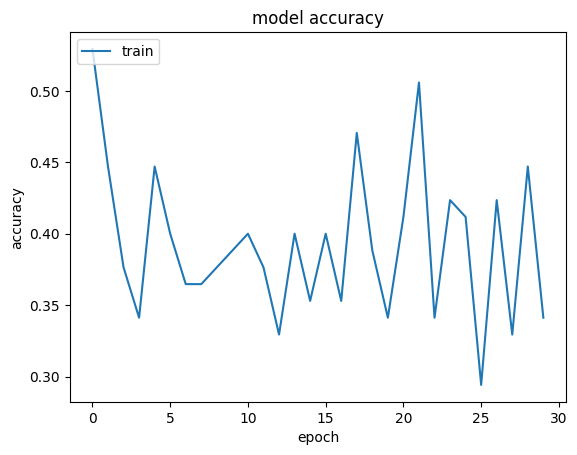

In [31]:
epochs = 30
hist = model.fit(train_x, train_y, epochs=epochs, verbose=2)
plot_hist(hist)

In [32]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 0s 439ms/step - loss: 1.1352 - accuracy: 0.2000
Loss = 1.1352128982543945
Test Accuracy = 0.20000000298023224


Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 257ms/step
predicted class:  [[0.15490797 0.8322895  0.01280257]]


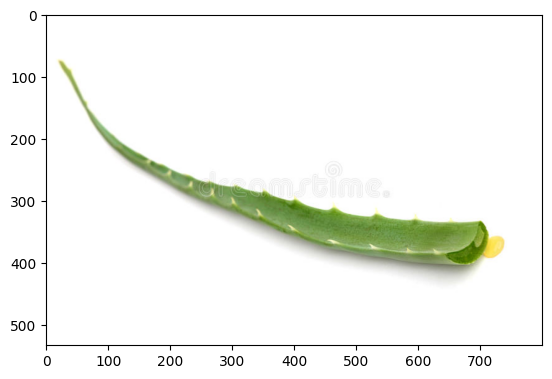

In [35]:
img_path = '/content/drive/MyDrive/Data (2)/Data/Test/Aloe_Vera/images (1).jpg'


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
#img = cv2.resize(img, None, fx=0.5, fy=0.5)
#img= cv.resize(img, (round(255 / 10), round(255/ 10)), interpolation=cv.INTER_AREA)

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)



preds=model.predict(x)
print("predicted class: ", preds )    # probabilities for being in each of the 3 classes